# Data Analysis and EDA

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib

In [3]:
df = pd.read_csv('./data/stackechange_csv/datascience.stackexchange.com-posts.csv', sep=',')
df.dtypes

Id                 int64
PostTypeId         int64
CreationDate      object
Score              int64
ViewCount        float64
FavoriteCount    float64
Title             object
Body              object
Tags              object
Topic             object
dtype: object

In [8]:
df['Body'].fillna('', inplace=True)
df['Title'].fillna('', inplace=True)
df['Tags'].fillna('', inplace=True)


In [8]:
# Convert Tags format <Tag1><Tag2> to List format [tag1, tag2, ...]
def tags_to_list(string):
    string = str(string)
    tags = []
    curr_tag = ''
    for s in string:
        curr_tag += s
        if s == '<':
            curr_tag = ''
        if s == '>':
            tags.append(re.sub('<|>', '', curr_tag))
    return tags

df['TagsList'] = df['Tags'].apply(tags_to_list)

In [3]:
# Add new column for post body length
df['BodyLength'] = df['Body'].apply(lambda x: len(str(x)))

In [4]:
# Plot body length distribution
df['BodyLength'].describe()
# df['BodyLength'].plot(kind='hist')

count    22472.000000
mean      1260.131408
std       1396.532853
min          3.000000
25%        460.000000
50%        881.000000
75%       1579.000000
max      39206.000000
Name: BodyLength, dtype: float64

In [5]:
# Duplicated posts by Id, Title, Body
print(df.duplicated('Id').any())
print(df.duplicated('Title').any())
print(df.duplicated('Body').any())

False
True
True


In [4]:
# Null values
df.isna().sum()

Id                   0
PostTypeId           0
CreationDate         0
Score                0
ViewCount        38476
FavoriteCount    64085
Title            38476
Body               166
Tags             38476
Topic                0
dtype: int64

In [14]:
# FavoriteCount not NaN rows
df[df['FavoriteCount'].notna()].shape

(3057, 12)

In [15]:
df[df['Tags'] == '<discussion>'].shape

(0, 12)

neural-networks                  2276
reinforcement-learning           2135
machine-learning                 2040
deep-learning                    1754
convolutional-neural-networks    1044
                                 ... 
open-face                           1
case-based-reasoning                1
instance-based-learning             1
leaky-relu                          1
energy-based-models                 1
Name: TagsList, Length: 978, dtype: int64


<AxesSubplot: >

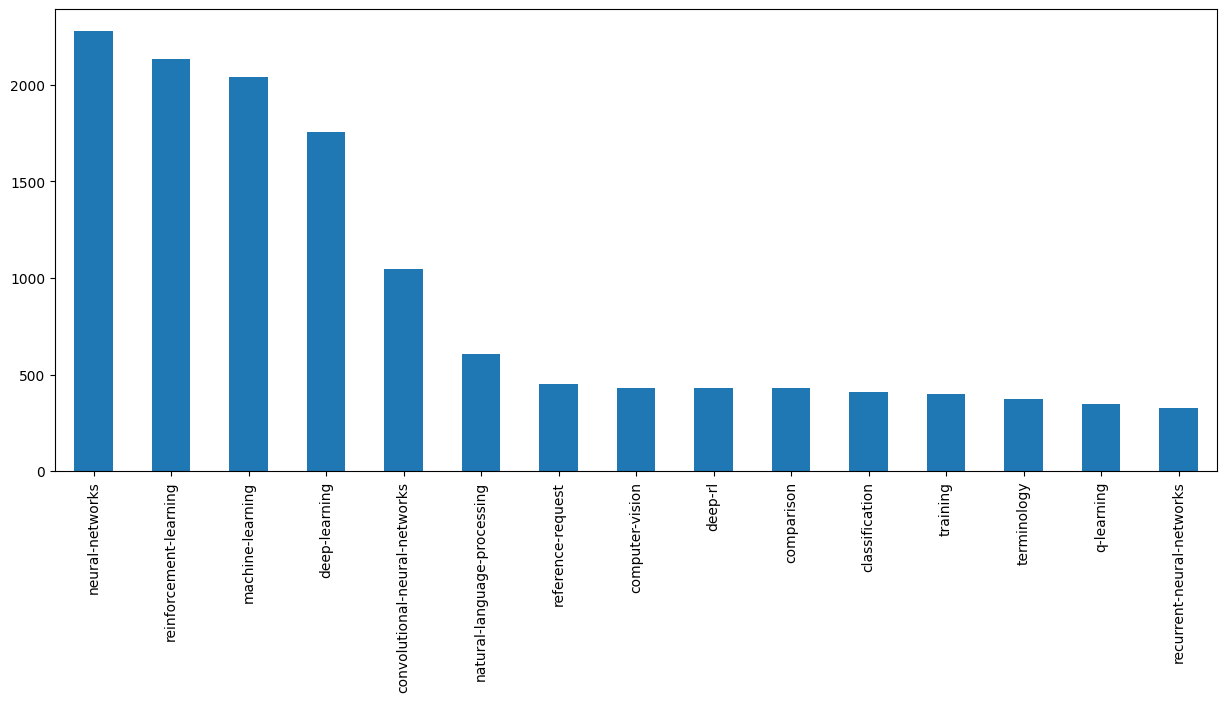

In [9]:
# Values counts on each Tag
print(df['TagsList'].explode().value_counts())

# Top 15 tags by numerosity
df['TagsList'].explode().value_counts().sort_values(ascending=False)[:15].plot(kind='bar', figsize=(15, 6))

In [17]:
# df['TagsList'].explode().value_counts().plot(kind='hist')

In [19]:
df['Tags'].unique().shape

(8552,)